## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [3]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

data_path = "motorbike_ambulance_calls.csv"


data = get_data(data_path)

print("Основна статистична інформація по числовим змінним:")
print(data.describe())

print("\nМаксимальні значення по всім змінним:")
print(data.max())

print("\nМінімальні значення по всім змінним:")
print(data.min())

print("\nРозмірність датасету:")
print(data.shape)


Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [4]:

print("Типи даних по кожній змінній:")
print(data.dtypes)


print("\nКількість даних по кожній змінній:")
print(data.count())


Типи даних по кожній змінній:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість даних по кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [5]:
if data.isnull().any().any():
    print("У датасеті є пропущені значення.")
else:
    print("У датасеті немає пропущених значень.")

У датасеті немає пропущених значень.


**Висновки з 1-3 завдання (детальні)**



1.  з вибірки видно, що ми маємо 17379 записів та 15 змінних, які описують різні аспекти аварій за участю мотоциклів та відповідні виклики швидкої допомоги.

    Загальна статистична інформація про числові змінні дозволяє зрозуміти розподіл даних. Наприклад, середня кількість викликів складає близько 189, але стандартне відхилення велике, що свідчить про значну варіабельність в цій кількості викликів. Також важливо відзначити, що максимальна кількість викликів складає 17379, що може вказувати на аномалію або високий пік у певний період.

    Мінімальні та максимальні значення дозволяють зрозуміти діапазон кожної змінної. Наприклад, колонка "yr" містить дані про рік, і ми бачимо, що вона має значення 0 та 1, що відповідає рокам 2011 та 2012 відповідно.

2.  Змінні index, yr, mnth, hr, holiday, weekday, workingday, weathersit, і cnt є цілими числами (int64).
    Змінні temp, atemp, hum, і windspeed мають тип даних float64.
    Змінна date має тип object, що може вказувати на те, що вона представлена у форматі рядка.

    У кожній змінній міститься 17379 значень, що вказує на те, що для кожного запису є дані по всіх ознаках.

3. Після перевірки наявності пропущених значень у датасеті не виявлено пропусків у всіх змінних. Це означає, що дані повні та готові для подальшого 
   аналізу без необхідності обробки пропущених значень.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [6]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = transform_date(data, 'date')

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"Перший день датасету - {first_day}.\nОстанній день датасету - {last_day}")

get_time_limits(data, 'date')


Перший день датасету - 2011-01-01 00:00:00.
Останній день датасету - 2012-12-31 00:00:00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1112\2072860337.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [7]:
categorical_data = data.select_dtypes(include=['object'])

print("Перші кілька рядків датасету з категоріальними змінними:")
print(categorical_data.head())

Перші кілька рядків датасету з категоріальними змінними:
   season
0  spring
1  spring
2  spring
3  spring
4  spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [8]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'springer': 1, 'summer': 2, 'fall': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

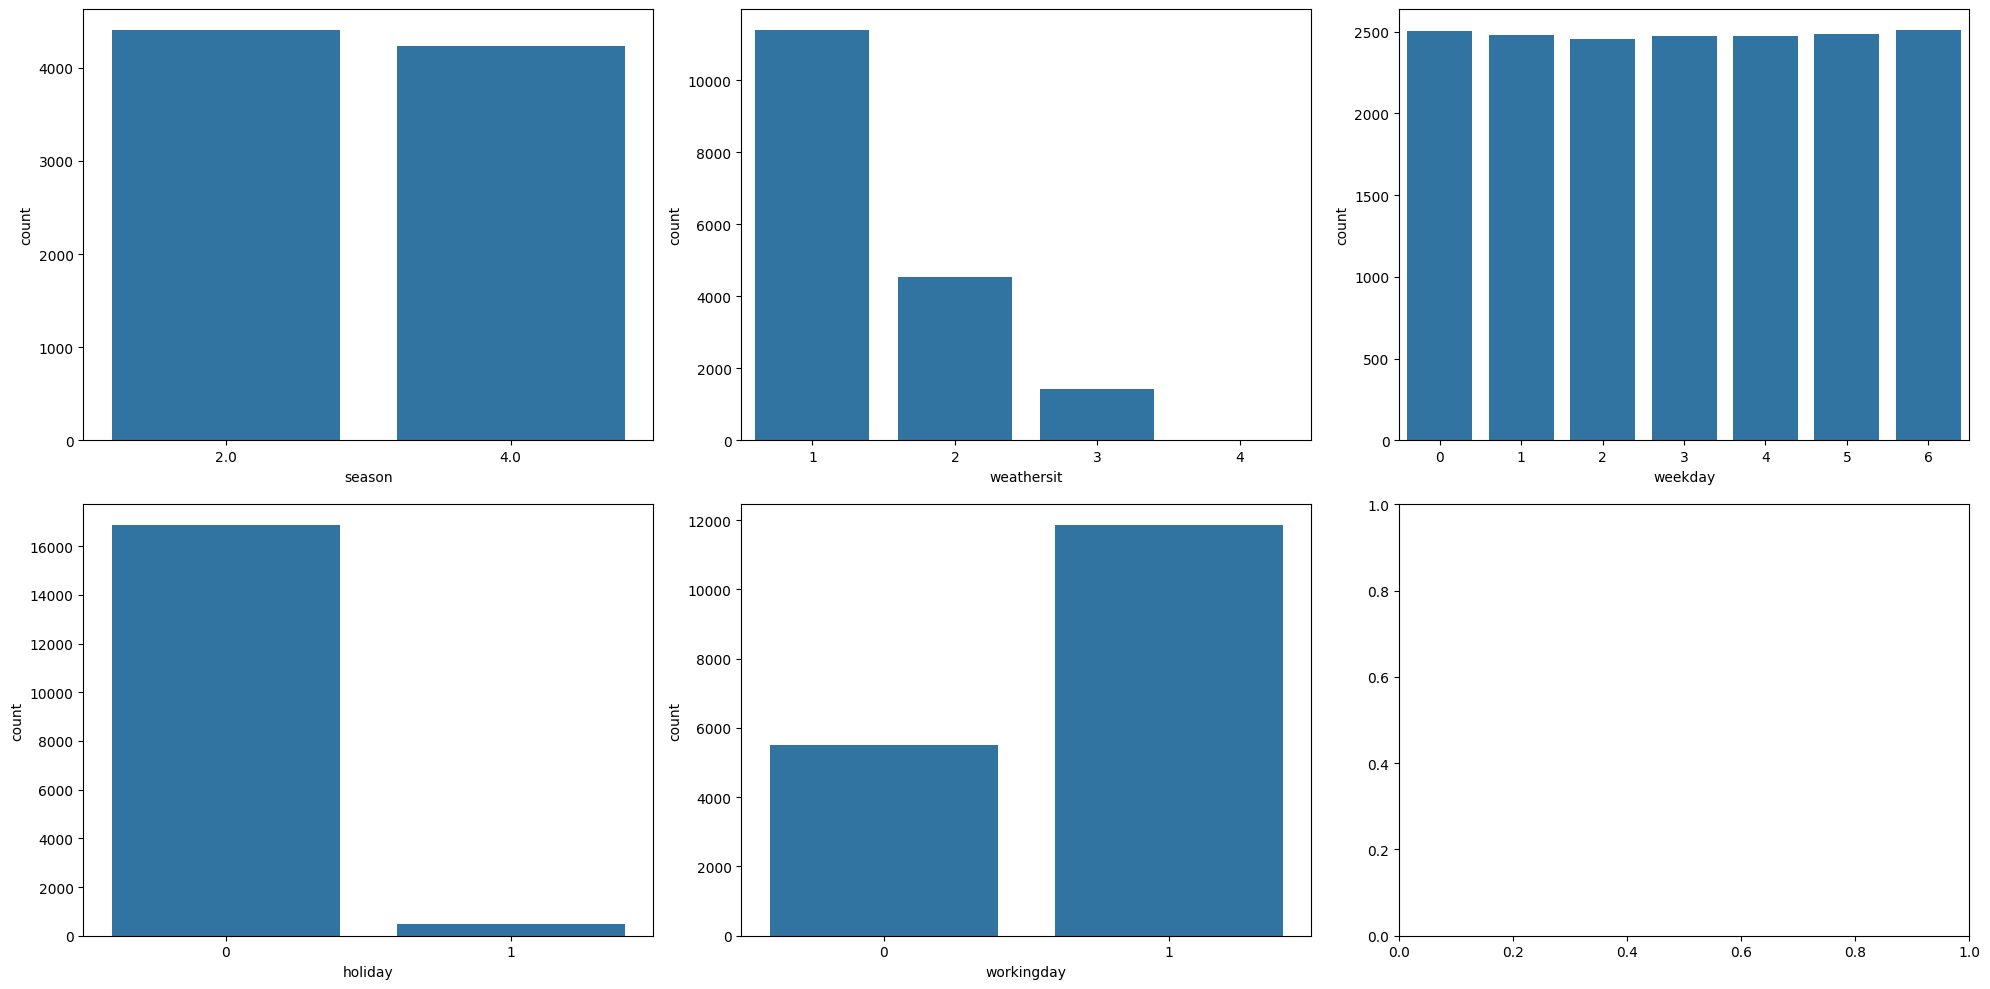

In [9]:
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

categorical_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']

for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=variable, data=data, ax=subplot)

plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**



1.  Після виконання цього завдання ми отримали окремий датасет, що містить лише категоріальні змінні. Це дозволить нам зосередитись на цих змінних окремо                        для подальшо гоаналізу та обробки.
2.   Ми перетворили категоріальну змінну season, яка містила текстові значення ("spring", "summer", "fall", "winter"), в числову шкалу. Це було зроблено шляхом заміни кожного текстового значення відповідним числовим кодом.
3. Ми побудували графіки countplot для всіх категоріальних змінних у нашому датасеті, які містяться у окремому датасеті категоріальних змінних. Ці графіки дозволяють нам візуалізувати розподіл кількості спостережень для кожної категорії у кожній змінній.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [10]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

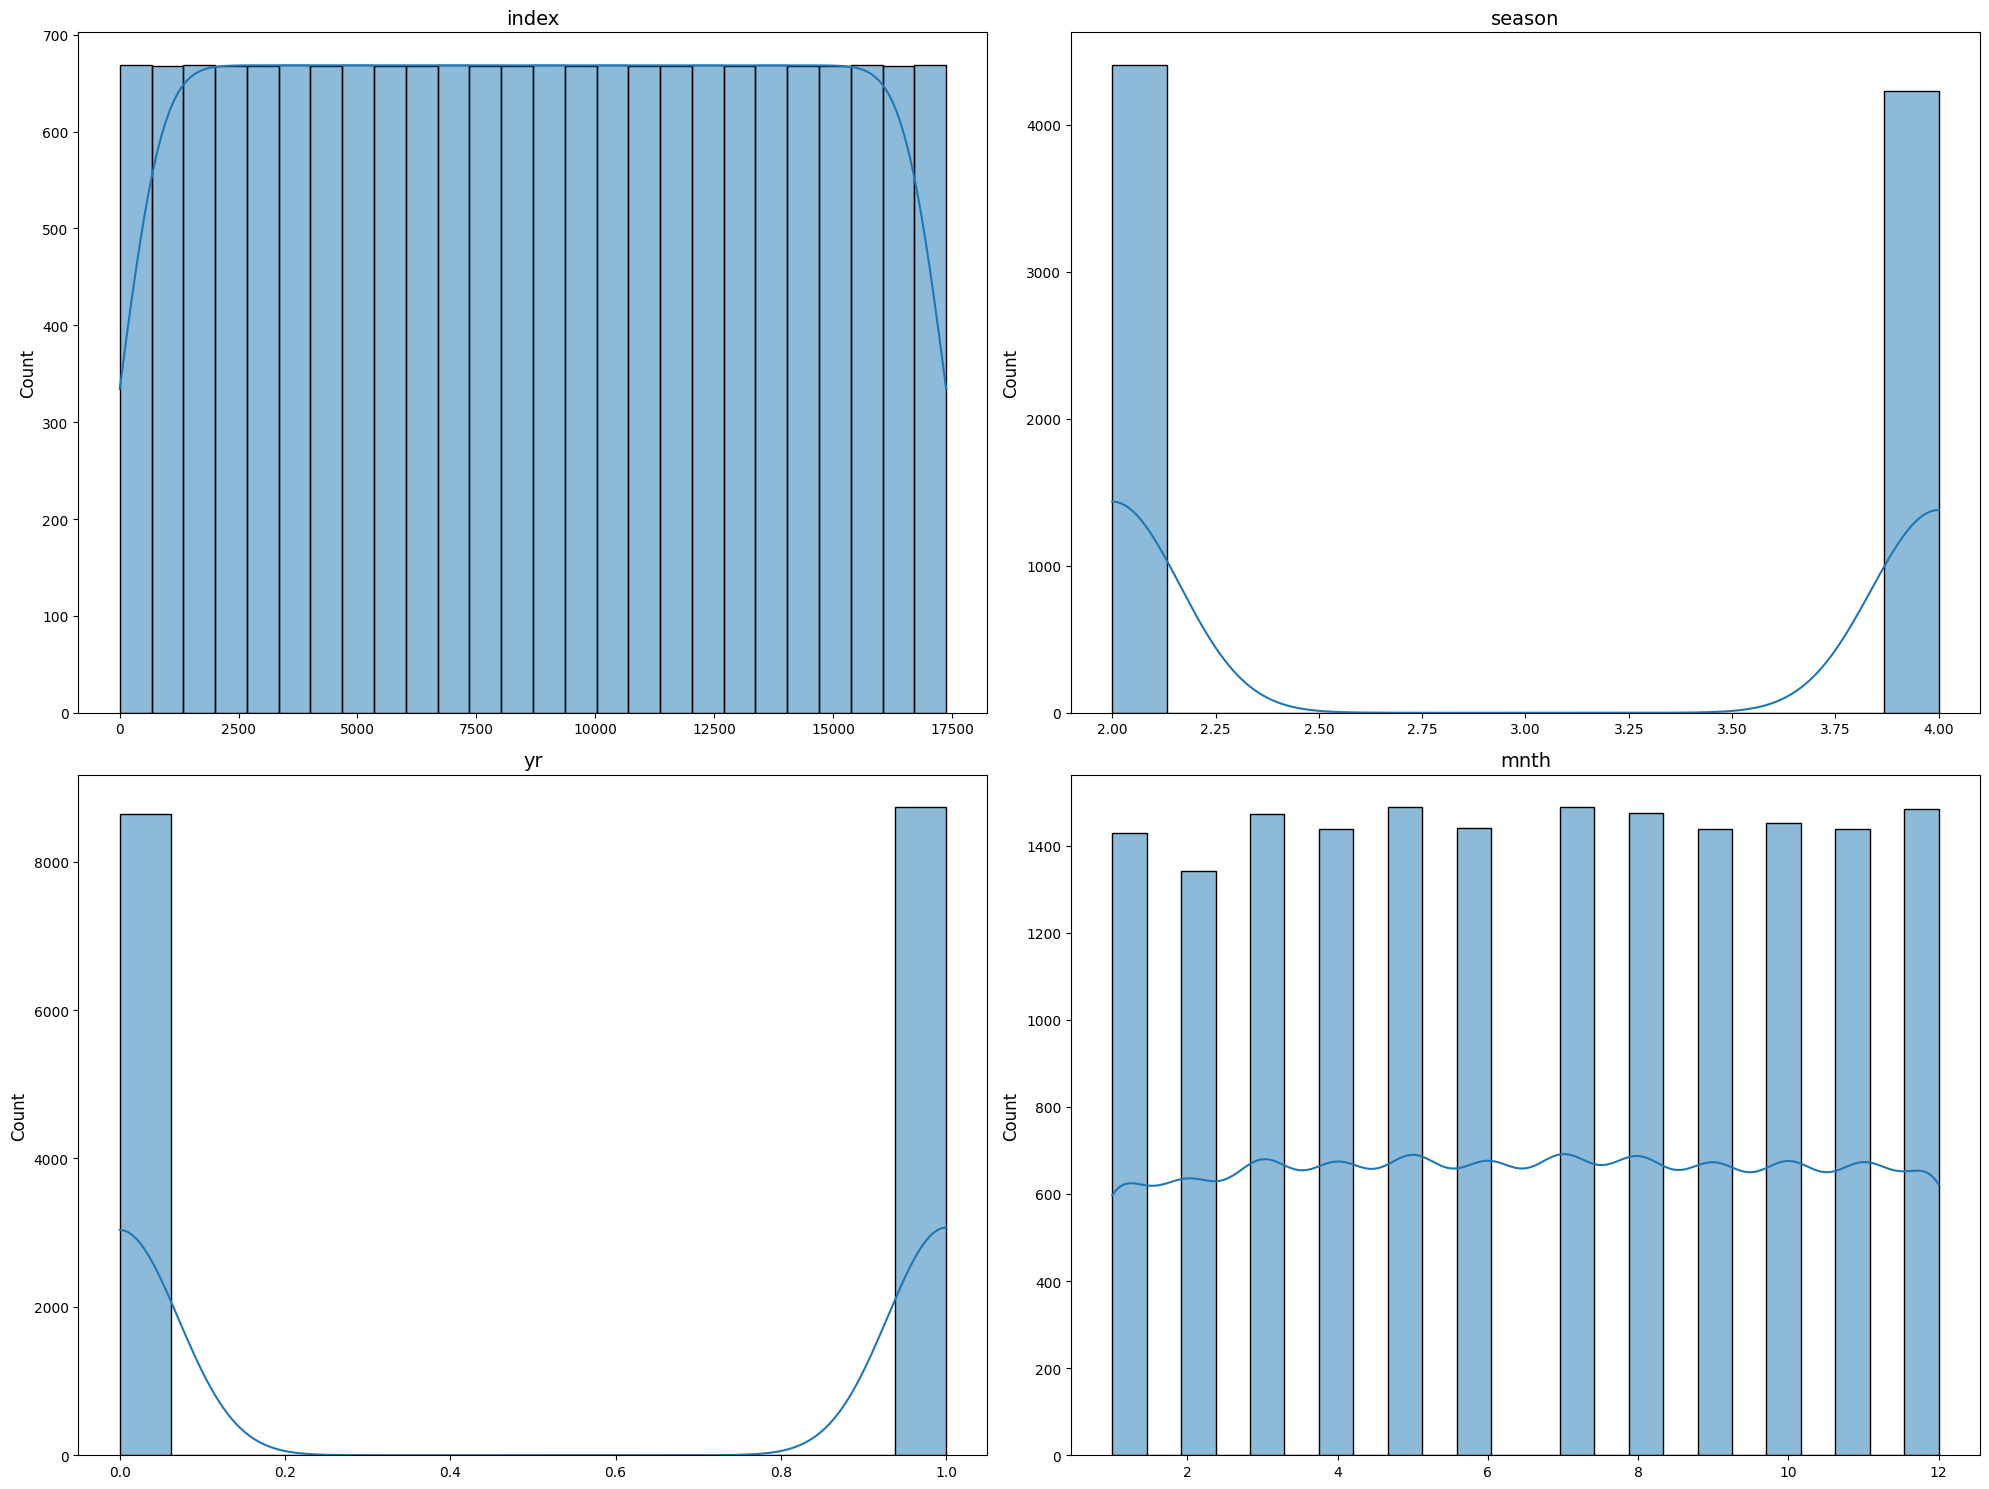

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

for i, column in enumerate(data_numerical.columns[:4]):
    sns.histplot(data_numerical[column], ax=ax.flatten()[i], kde=True)
    ax.flatten()[i].set_title(column, fontsize=14)
    ax.flatten()[i].set_xlabel('')
    ax.flatten()[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

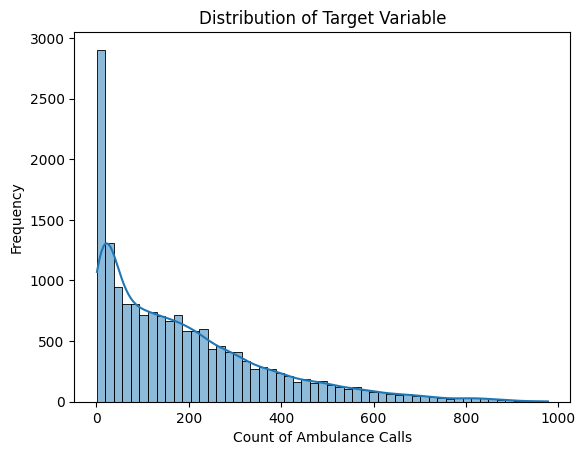

Коефіцієнт нахилу: 0.010064609532772014


In [12]:
import seaborn as sns
from scipy.stats import linregress

sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Count of Ambulance Calls')
plt.ylabel('Frequency')
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(data['cnt'].index, data['cnt'])

print("Коефіцієнт нахилу:", slope)


**Висновки з 8-10 завдання (детальні)**

1 Виділення числових змінних:
Під час виділення числових змінних було створено окремий датасет data_numerical, що містить лише числові дані. Це дозволяє зосередитись на аналізі саме числових параметрів та їх впливу на цільову змінну без зайвих даних.

2 Побудова гістограм розподілу:
Гістограми розподілу числових змінних надають важливу інформацію про розподіл даних в датасеті. Зокрема, можна оцінити, чи є дані скошені або рівномірно розподілені, а також визначити рівень концентрації даних у певних інтервалах.

3 Аналіз цільової змінної:
Побудовано гістограму розподілу цільової змінної, а також розраховано її коефіцієнт нахилу. Це дозволило оцінити розподіл значень цільової змінної та визначити нахил лінії регресії. У цьому випадку коефіцієнт нахилу близький до нуля, що може вказувати на слабку асоціацію між цільовою змінною та іншими змінними.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

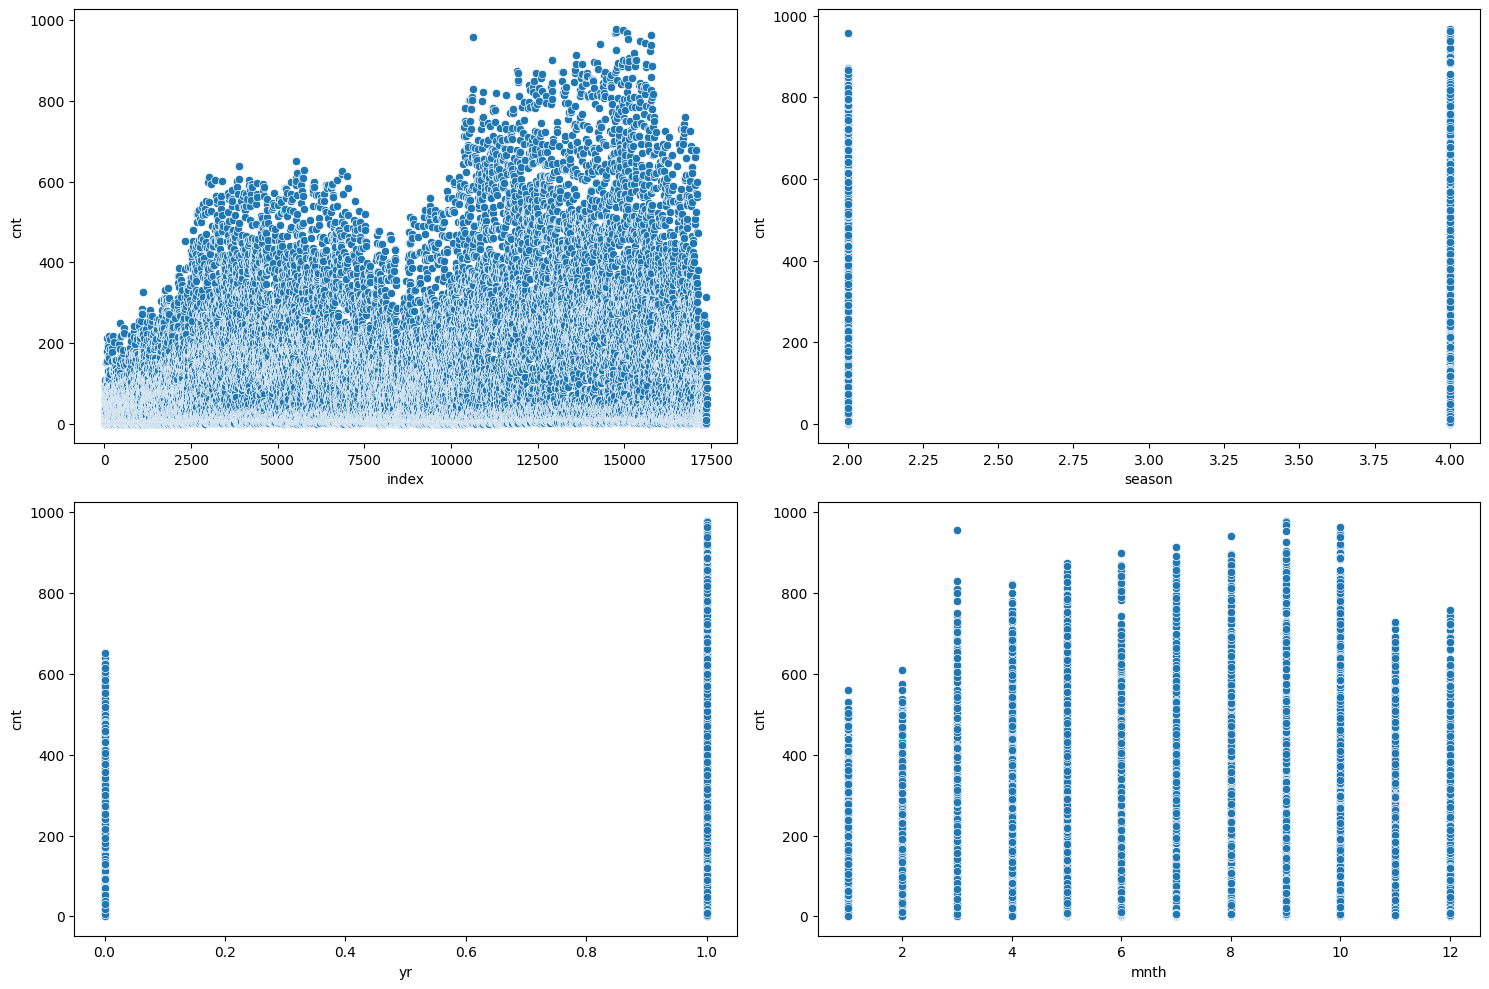


Data for scatterplot of index vs cnt:
       index  cnt
0          1   16
1          2   40
2          3   32
3          4   13
4          5    1
...      ...  ...
17374  17375  119
17375  17376   89
17376  17377   90
17377  17378   61
17378  17379   49

[17379 rows x 2 columns]

Data for scatterplot of season vs cnt:
       season  cnt
0         NaN   16
1         NaN   40
2         NaN   32
3         NaN   13
4         NaN    1
...       ...  ...
17374     NaN  119
17375     NaN   89
17376     NaN   90
17377     NaN   61
17378     NaN   49

[17379 rows x 2 columns]

Data for scatterplot of yr vs cnt:
       yr  cnt
0       0   16
1       0   40
2       0   32
3       0   13
4       0    1
...    ..  ...
17374   1  119
17375   1   89
17376   1   90
17377   1   61
17378   1   49

[17379 rows x 2 columns]

Data for scatterplot of mnth vs cnt:
       mnth  cnt
0         1   16
1         1   40
2         1   32
3         1   13
4         1    1
...     ...  ...
17374    12  119
17375    

In [13]:


fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data_numerical, ax=subplot)

plt.tight_layout()
plt.show()
for i, var in enumerate(data_numerical.drop('cnt', axis=1)):
    print(f"\nData for scatterplot of {var} vs cnt:")
    print(data_numerical[[var, 'cnt']])


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

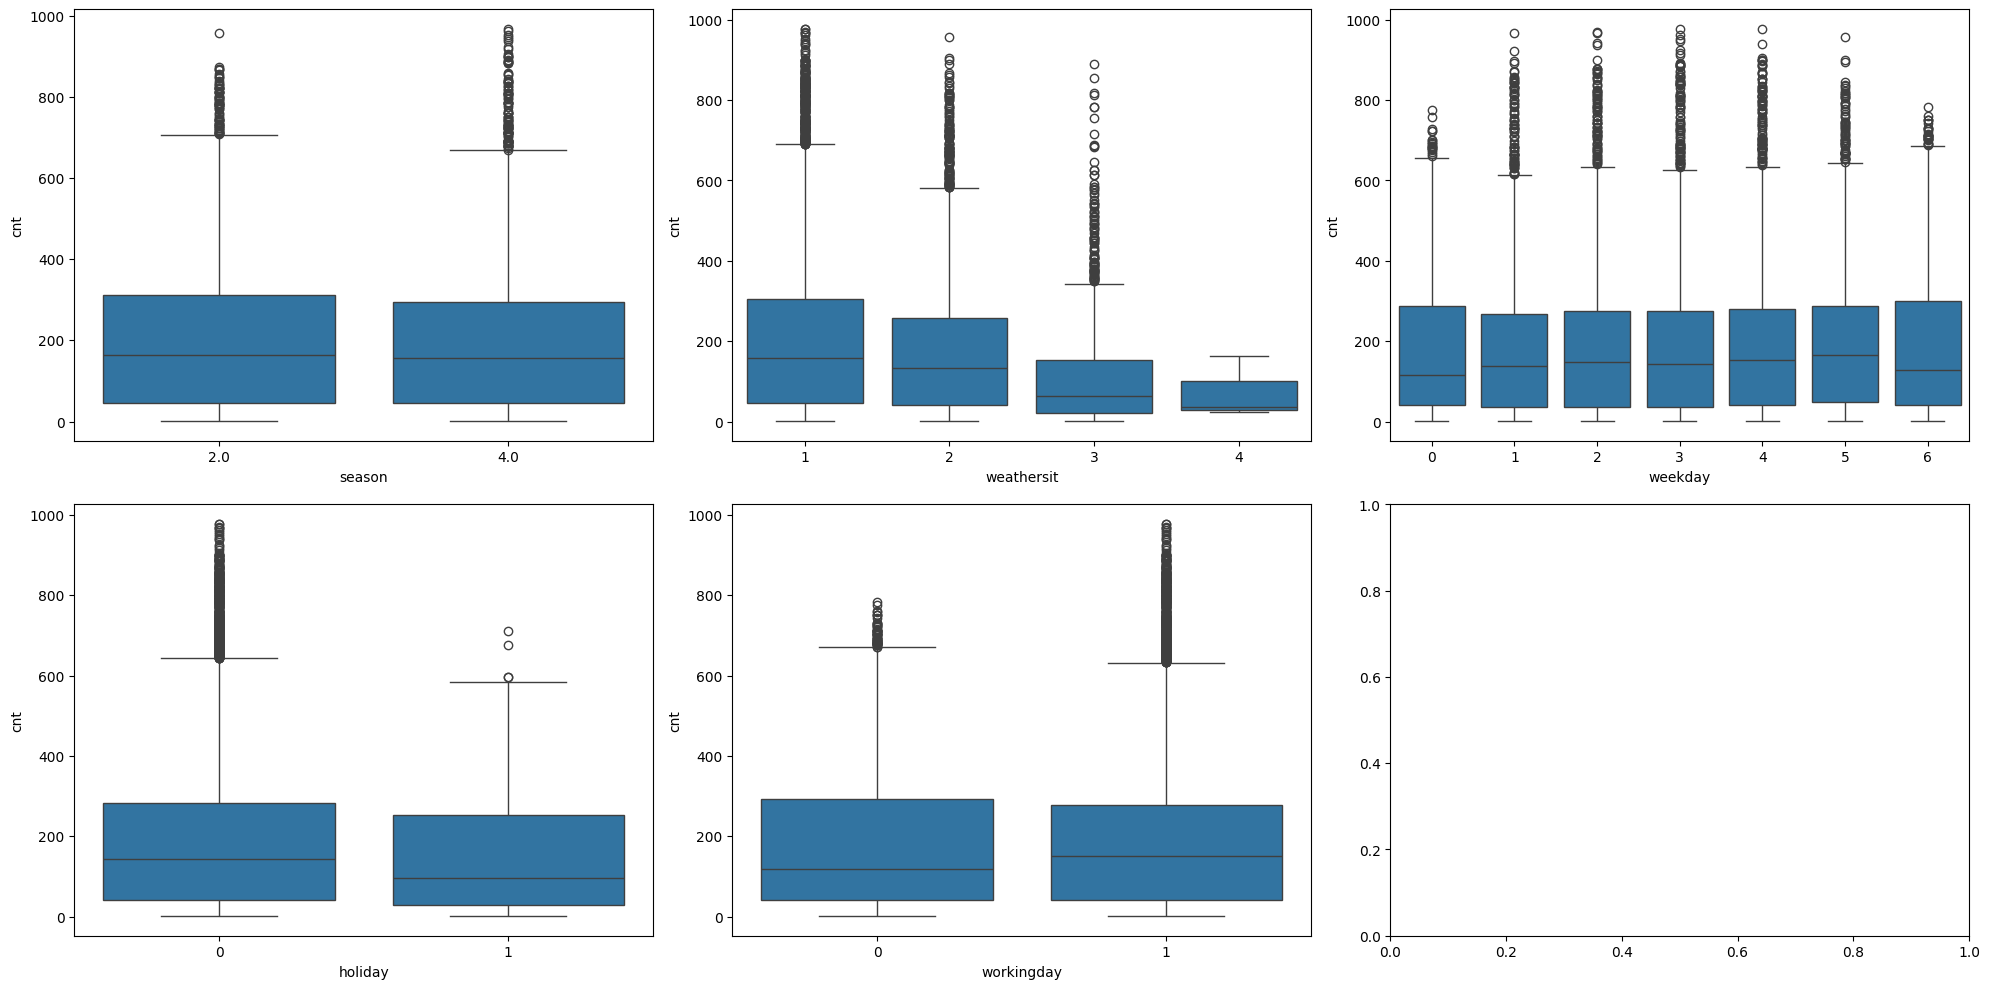

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

categorical_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']

for var, subplot in zip(categorical_columns, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1.   Графіки scatterplot демонструють відношення між кожною числовою змінною та цільовою змінною cnt. На цих графіках можна спостерігати, як змінюється кількість викликів швидкої допомоги в залежності від значень різних числових змінних.

2.   Графіки boxplot демонструють розподіл кількості викликів швидкої допомоги (cnt) для кожної категоріальної змінної. Вони дозволяють оцінити, як цільова змінна змінюється в залежності від кожної категоріальної змінної. Наприклад, можна перевірити, чи є різниця в кількості викликів швидкої допомоги в різні сезони, погодні умови, дні тижня тощо.
3. На графіках scatterplot можна виявити наявність потенційних взаємозв'язків між числовими змінними та цільовою змінною. Наприклад, якщо спостерігається певний закономірний розподіл точок, це може свідчити про наявність лінійного або не лінійного зв'язку між цими змінними.
4. Графіки boxplot допомагають виявити наявність викидів або аномальних значень у кожній категоріальній змінній, що може бути важливою інформацією при подальшому аналізі даних.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

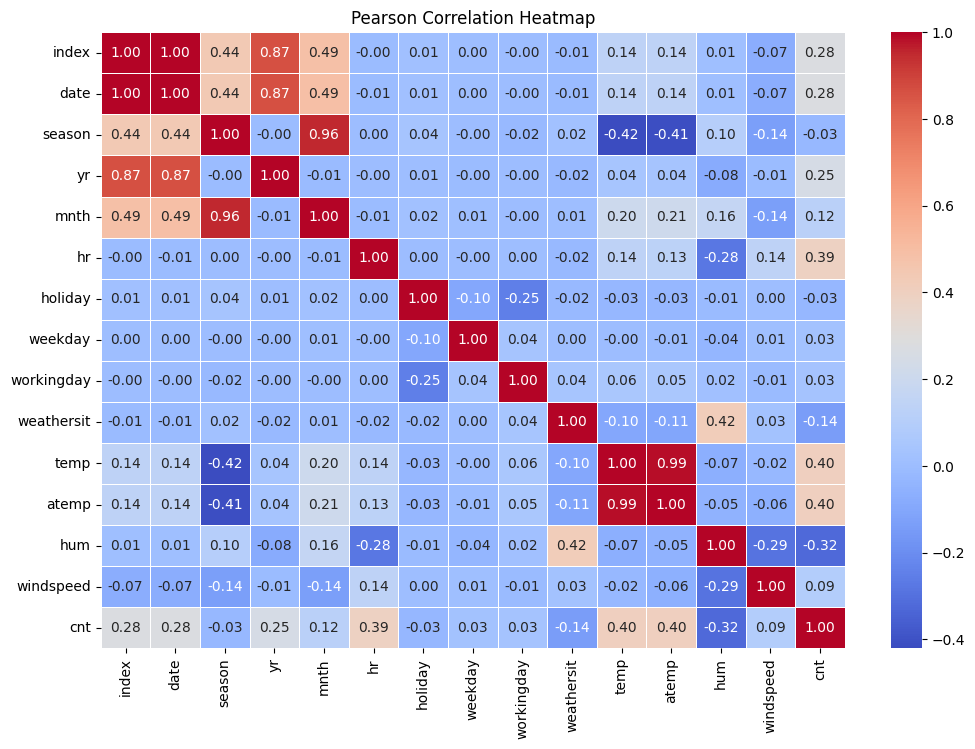

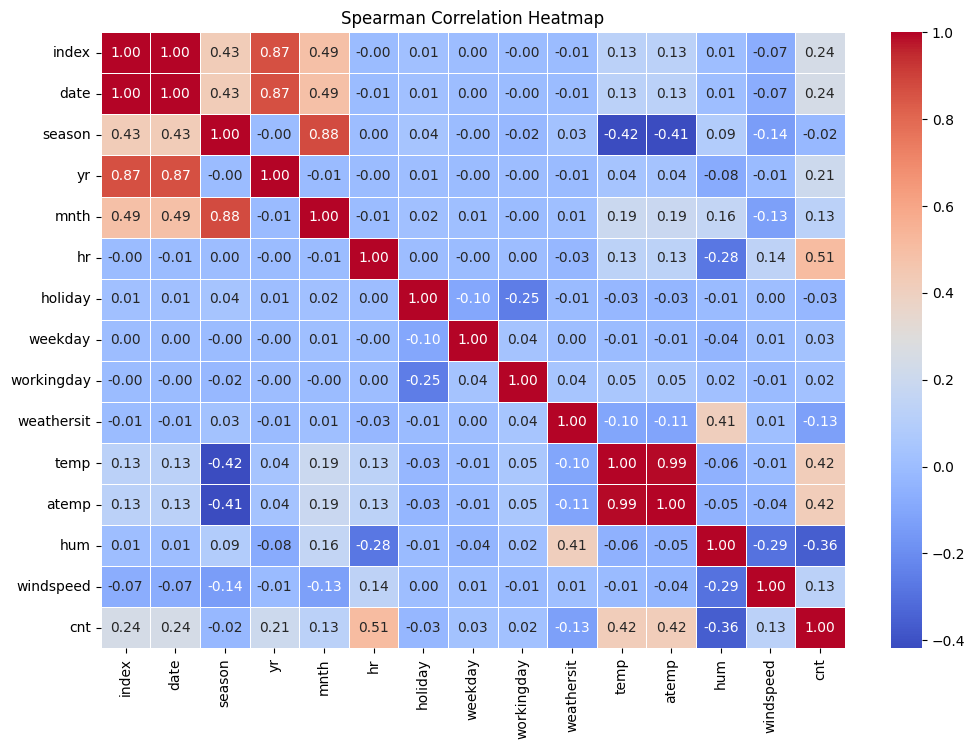

In [16]:
import seaborn as sns

# Вирахування кореляційних коефіціентів за методом Пірсона
pearson_corr = data.corr(method='pearson')

# Відображення матриці кореляції Пірсона у вигляді теплокарти
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Вирахування кореляційних коефіціентів за методом Спірмена
spearman_corr = data.corr(method='spearman')

# Відображення матриці кореляції Спірмена у вигляді теплокарти
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()


In [ ]:
# Метод Пірсона: Цей метод оцінює лінійні зв'язки між змінними. Кореляційні коефіцієнти, які наближаються до 1 або -1, вказують на сильну лінійну залежність між змінними. Коефіцієнти близькі до 0 вказують на відсутність кореляції. 
# Негативне значення вказує на зворотний зв'язок, тобто збільшення однієї змінної супроводжується зменшенням іншої. У теплокарті, якщо відносно велика кількість значень близька до 1 або -1, то це свідчить про наявність сильних зв'язків між відповідними змінними.

# Метод Спірмена: Цей метод оцінює не тільки лінійні, але й монотонні зв'язки між змінними. Він не обмежується тільки лінійними взаємозв'язками, тому може виявляти інші типи залежностей, що можуть бути присутніми у даних.
# Теплокарта для цього методу також дає інформацію про кореляцію між змінними, але з врахуванням інших типів зв'язків, окрім лінійних.

# Отже, відмінність між методами полягає у їхній спроможності виявляти різноманітні типи зв'язків між змінними. Кожен з методів має свої сильні сторони та використовується в залежності від природи даних та цілей аналізу.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [17]:
def get_dummies(df: pd.DataFrame):
    features = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
    return features

In [18]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [19]:
features['night_hours'] = ((features['hr'] < 6) | (features['hr'] > 18)).astype(int)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

Видалення змінних date та atemp здійснюється з кількох причин. Перш за все, змінна date не є кількісним показником, а представляє собою категоріальну змінну, тому її включення може призвести до зайвої розрізненості у даних. Змінна atemp, яка визначає температуру за відчуттям, може бути сильно корельована з фактичною температурою (temp), тому включення обох може спричинити проблему мультиколінеарності, а також дублювати інформацію, що може призвести до нестабільності моделі та менш точних прогнозів.

In [23]:
features_lr = features.drop(['season_4.0', 'mnth_4', 'weekday_1', 'weathersit_2', 'hr', 'atemp', 'date'], axis=1)


In [24]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [26]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [27]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 18164.824, test: 17572.276
R^2 train: 0.457, test: 0.444


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

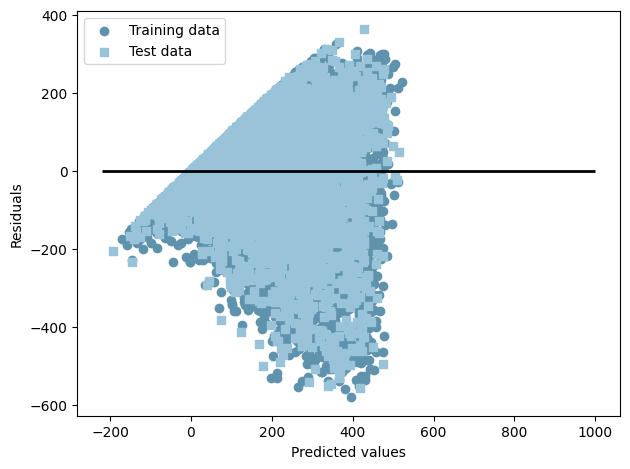

In [28]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()
plt.show()

**Висновки з завдання (детальні)**

1. Підготовка даних: Виконано завдання з підготовки даних, включаючи завантаження, обробку категоріальних змінних та розділення даних на тренувальний та тестовий набори.
2. Побудова моделі лінійної регресії: Було побудовано модель лінійної регресії з використанням підготовлених даних. Модель навчалася на тренувальному наборі та перевірялася на тестовому наборі.
3. Оцінка моделі: Оцінка якості моделі була проведена за допомогою обчислення середньоквадратичної помилки (MSE) та коефіцієнта детермінації (R^2) на тренувальному та тестовому наборах.
4. Візуалізація залишків моделі: Було побудовано графік для візуалізації залишків моделі, щоб оцінити розподіл помилок.